In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Checking for Missing Values

In [2]:
purchase = pd.read_csv("QVI_purchase_behaviour.csv")
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [3]:
transaction = pd.read_csv("QVI_transaction_data.csv")
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


- Both sales and transaction data has no missing value
- Not all feature from both tables are numeric

# Checking for Dataset Consistency

In [4]:
# Checking consistency of the distinct product
print(transaction.PROD_NBR.unique().shape[0])
print(transaction.PROD_NAME.unique().shape[0])

114
114


The number of uniqe product number and product name match, indicating consistency in product features

# Checking (and handling) Outliers

In [5]:
# Grouping by date to get a time series data with summed and counted total sales
gbsum = transaction.groupby('DATE').sum()
gbcount = transaction.groupby('DATE').count()

print('Grouped by sum \n', gbsum.describe().iloc[:, -2:], end='\n\n')
print('Grouped by count \n', gbcount.describe().iloc[:, -2:])

Grouped by sum 
           PROD_QTY    TOT_SALES
count   364.000000   364.000000
mean   1387.703297  5314.326923
std      81.406539   320.337694
min    1064.000000  4036.500000
25%    1354.000000  5165.975000
50%    1386.500000  5327.100000
75%    1426.250000  5468.525000
max    1818.000000  6923.000000

Grouped by count 
          PROD_QTY   TOT_SALES
count  364.000000  364.000000
mean   727.571429  727.571429
std     35.256836   35.256836
min    648.000000  648.000000
25%    706.750000  706.750000
50%    724.000000  724.000000
75%    744.250000  744.250000
max    939.000000  939.000000


<Axes: xlabel='DATE', ylabel='TOT_SALES'>

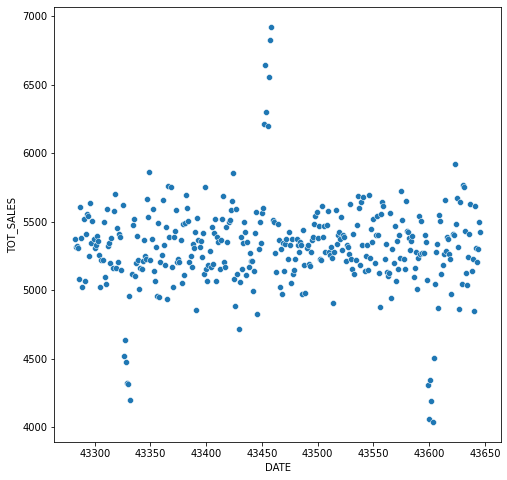

In [6]:
plt.subplots(figsize=(8, 8))
sb.scatterplot(x=gbsum.index,
               y=gbsum.TOT_SALES,
               )

Text(0, 0.5, 'Count of Sales')

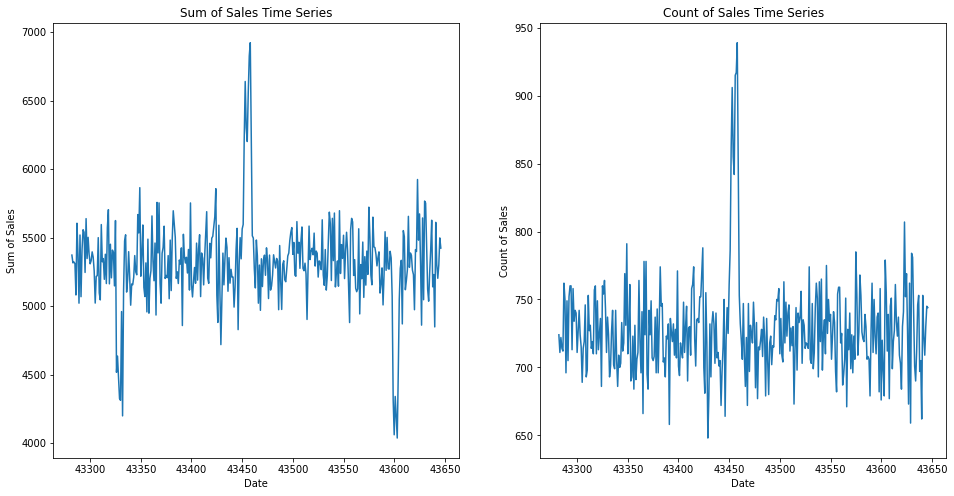

In [7]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121) 
ax1.plot(gbsum.index, gbsum.TOT_SALES)
ax1.set_title('Sum of Sales Time Series')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sales')

ax2 = fig.add_subplot(122) 
ax2.plot(gbcount.index, gbcount.TOT_SALES)
ax2.set_title('Count of Sales Time Series')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count of Sales')

In [8]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


The difference between the mean (1.9 and 7.3) and max value (200 and 650) of product quantity and total sales attributes (respectively) are too drastic, might be caused by incorrect input or very unusual event. We can sort our data in descending order to see this anomaly closer. 

In [9]:
transaction.drop('PROD_NAME', axis=1).sort_values('TOT_SALES', ascending=0)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,200,650.0
69763,43605,226,226000,226210,4,200,650.0
69496,43327,49,49303,45789,14,5,29.5
55558,43599,190,190113,190914,14,5,29.5
171815,43329,24,24095,20797,14,5,29.5
...,...,...,...,...,...,...,...
259695,43417,41,41089,38002,76,1,1.5
259707,43391,41,41267,38201,76,1,1.5
197005,43323,167,167121,168928,76,1,1.5
216449,43525,264,264032,262778,76,1,1.5


There are two transaction from the same customer (LYLTY_CARD_NUMBER) at the same store with both quantity are 200 and both total sales are 650. This is too far even compared to the third row of the data with only 5 product quantity and 29.5 total sales. The next step is to remove the outliers by simply excluding this customer from the data.

In [10]:
trans2 = transaction[transaction['LYLTY_CARD_NBR'] != 226000]
trans2.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,43464.036230,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,105.389007,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


# Data Transforming

Deriving extra features from the dataset (bag size and brand name)

In [64]:
# Define function to extract the number (size) 
# from PROD_NAME with regex
import re

def extract_bag_size(string):
    pattern = r"(\d+)"
    match = re.search(pattern, string)
    if match:
        return int(match.group())

# Define function to remove last 4 substring and white spaces     
def extract_brand_name(prod_name):
    return prod_name.split()[0]

# Apply functions to transaction table
trans2['PACK_SIZE'] = trans2['PROD_NAME'].apply(extract_bag_size)
trans2['BRAND_NAME'] = trans2['PROD_NAME'].apply(extract_brand_name)

trans2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_48196\3627544896.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans2['PACK_SIZE'] = trans2['PROD_NAME'].apply(extract_bag_size)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_48196\3627544896.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans2['BRAND_NAME'] = trans2['PROD_NAME'].apply(extract_brand_name)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


In [65]:
trans2.BRAND_NAME.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

Replacing short name of the brand with the full name

In [66]:
x = {'red':'RRD',
     'ww':'WOOLWORTHS',
     'ncc':'NATURAL',
     'snbts':'SUNBITES',
     'infzns':'INFUZIONS',
     'smith':'SMITHS',
     'dorito':'DORITOS',
     'grain':'GRNWVES'}

trans2['BRAND_NAME'] = trans2['BRAND_NAME'].str.lower().replace(x).str.upper()
trans2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_48196\1785776237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans2['BRAND_NAME'] = trans2['BRAND_NAME'].str.lower().replace(x).str.upper()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,TOSTITOS
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,DORITOS
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS


In [67]:
print('Bag size variants: ', trans2.PACK_SIZE.unique().shape[0])
print('Brand variants: ', trans2.BRAND_NAME.unique().shape[0])

Bag size variants:  21
Brand variants:  21


The next step is to make all dataset as numeric to simplify and enable quantized data analysis. Since Product Name is analogue with Product Number, this column can be dropped. Brand Name from transaction table will be transformed into brand number and Lifestage along with Premium Customer features from purchase table will be changed into numeric. 

In [68]:
trans3 = trans2.drop('PROD_NAME', axis=1)
purc2 = purchase.copy()

In [69]:
# Convert categorical column to numeric
trans3['BRAND_NUM'], cat_labels1 = pd.factorize(trans3['BRAND_NAME'])
purc2['LIFESTAGE_NUM'], cat_labels2 = pd.factorize(purc2['LIFESTAGE'])
purc2['PREM_CUST_NUM'], cat_labels3 = pd.factorize(purc2['PREMIUM_CUSTOMER'], sort=1)

# Create a list of category-value pairs
cat_val_pairs1 = list(zip(cat_labels1, trans3['BRAND_NUM'].unique()))
cat_val_pairs2 = list(zip(cat_labels2, purc2['LIFESTAGE_NUM'].unique()))
cat_val_pairs3 = list(zip(cat_labels3, purc2['LIFESTAGE_NUM'].unique()))

trans3 = trans3.drop('BRAND_NAME', axis=1)
purc2 = purc2.drop('LIFESTAGE', axis=1)
purc2 = purc2.drop('PREMIUM_CUSTOMER', axis=1)

In [70]:
print(trans3.info(), end='\n\n')
print(purc2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264834 non-null  int64  
 1   STORE_NBR       264834 non-null  int64  
 2   LYLTY_CARD_NBR  264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_QTY        264834 non-null  int64  
 6   TOT_SALES       264834 non-null  float64
 7   PACK_SIZE       264834 non-null  int64  
 8   BRAND_NUM       264834 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 20.2 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LYLTY_CARD_NBR  72637 non-null  int64
 1   LIFESTAGE_NUM   72637 non-null  int64
 2   PREM_CUST_NUM   72637 non-null  int64
dtypes: i

# Merging Data

In [114]:
df = pd.merge(
    purchase,
    trans2,
    how="inner",
    on='LYLTY_CARD_NBR',
) # Merged both tables on the card number

df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS


In [117]:
# Merging numeric tables for further processing if needed
df_num = pd.merge(
    purc2,
    trans3,
    how="inner",
    on='LYLTY_CARD_NBR',
) # Merged both tables on the card number

df_num.head()

,LYLTY_CARD_NBR,LIFESTAGE_NUM,PREM_CUST_NUM,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NUM
0,1000,0,2,43390,1,1,5,2,6.0,175,0
1,1002,0,1,43359,1,2,58,1,2.7,150,13
2,1003,1,0,43531,1,3,52,1,3.6,210,5
3,1003,1,0,43532,1,4,106,1,3.0,175,0
4,1004,2,1,43406,1,5,96,1,1.9,160,8


# Exploratory Data Analysis

## Grouping sales data by customer segments

In [115]:
cols = ['PREMIUM_CUSTOMER', 'PROD_QTY', 'TOT_SALES'] # Returned columns
grps = ['PREMIUM_CUSTOMER'] # Columns to group by

premvsales_count = df.loc[:, cols].groupby(grps).count()
premvsales_sum = df.loc[:, cols].groupby(grps).sum()
premvsales_mean = df.loc[:, cols].groupby(grps).mean()

[Text(0.5, 1.0, 'Sales Average by Customer Segment'),
 Text(0.5, 0, 'Customer Segment'),
 Text(0, 0.5, 'Sales Average')]

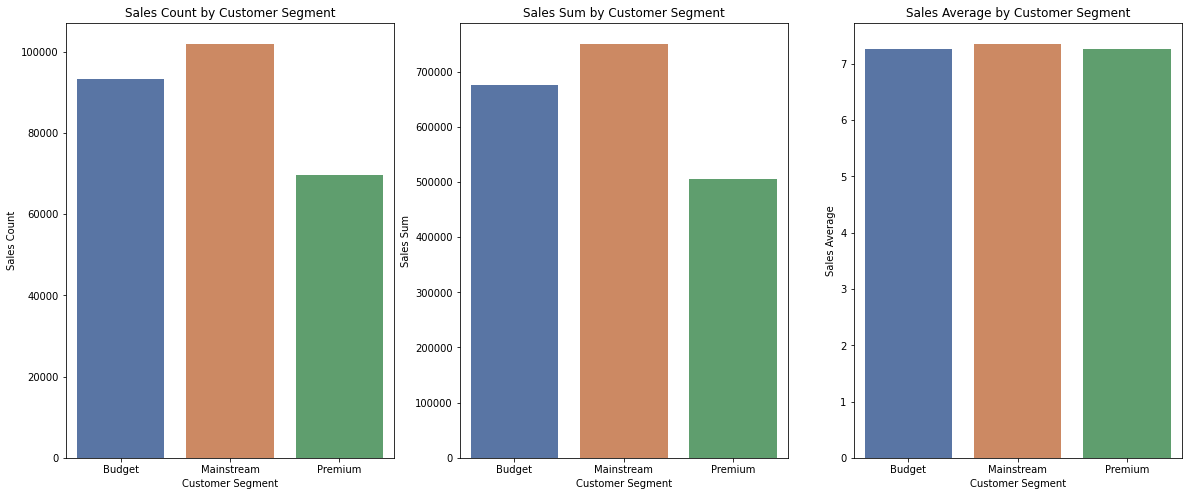

In [116]:
fig2 = plt.figure(figsize=(20, 8))

ax1 = fig2.add_subplot(131)
sb.barplot(data = premvsales_count,
           x = premvsales_count.index,
           y = premvsales_count.TOT_SALES,
           palette = 'deep'
           ).set(title='Sales Count by Customer Segment',
                 xlabel ="Customer Segment", ylabel = "Sales Count") 

ax2 = fig2.add_subplot(132)
sb.barplot(data = premvsales_sum,
           x = premvsales_sum.index,
           y = premvsales_sum.TOT_SALES,
           palette = 'deep'
           ).set(title='Sales Sum by Customer Segment',
                 xlabel ="Customer Segment", ylabel = "Sales Sum")

ax3 = fig2.add_subplot(133) 
sb.barplot(data = premvsales_mean,
           x = premvsales_mean.index,
           y = premvsales_mean.TOT_SALES,
           palette = 'deep'
           ).set(title='Sales Average by Customer Segment',
                 xlabel ="Customer Segment", ylabel = "Sales Average")

- Mainstream customers contribute the most on all three aggregation of the sales (count, sum, and mean)
- There are not much difference on sales average from every class
- Similar pattern found on sales count and sales total sum
- It can be assumed that there is no special behavior of each class on how many times they buy that affects the total sum of sales

([<matplotlib.patches.Wedge at 0x1577b03a100>,
 [Text(0.3313012950599338, 1.048922996168742, 'Mainstream'),
  Text(-0.9921718718009669, -0.47496839558750203, 'Budget'),
  Text(0.751739180577092, -0.8030493162846739, 'Premium')],
 [Text(0.1807097973054184, 0.572139816092041, '40%'),
  Text(-0.5411846573459819, -0.25907367032045564, '34%'),
  Text(0.41003955304205014, -0.4380268997916403, '26%')])

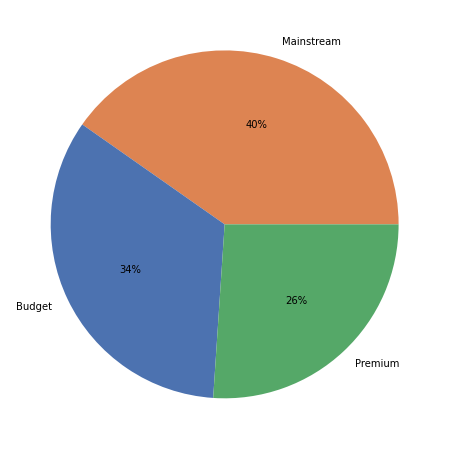

In [118]:
labels = purchase.PREMIUM_CUSTOMER.value_counts().index
colours = {'Budget': '#4C72B0',
           'Mainstream': '#DD8452',
           'Premium': '#55A868'}

plt.figure(figsize = (8, 8))
plt.pie(purchase.PREMIUM_CUSTOMER.value_counts(), 
        labels = labels, 
        colors = [colours[key] for key in labels], 
        autopct='%.0f%%')

Mainstream customer makes the most of the segmentation (40%)

## Grouping sales data by lifestages and customer segments

In [190]:
cols = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES'] # Returned columns
grps = ['LIFESTAGE', 'PREMIUM_CUSTOMER'] # Columns to group by

lifepremsales_count = df.loc[:, cols].groupby(grps).count()
lifepremsales_sum = df.loc[:, cols].groupby(grps).sum()
lifepremsales_mean = df.loc[:, cols].groupby(grps).mean()

<Axes: title={'center': 'Average Sales by Lifestage and Customer Class'}, xlabel='Average Sales', ylabel='Lifestage'>

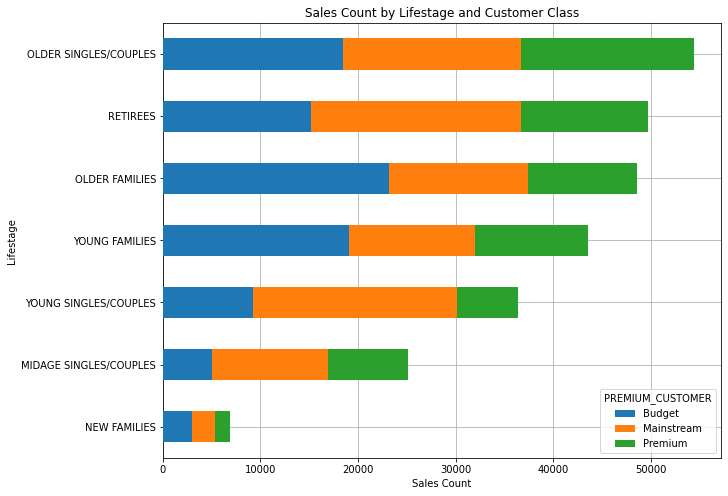

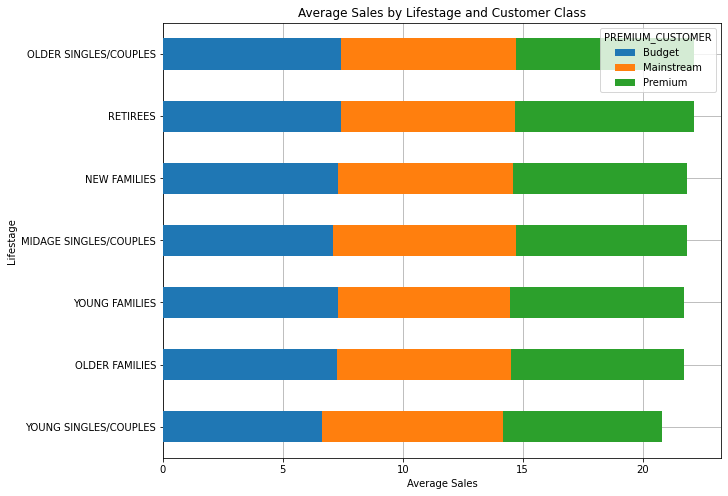

In [289]:
# Temporary dataframe to return the sum of sales count and average sales by lifestage/class (for sorting purpose)
temp_df = lifepremsales_count.unstack()
temp_df['SUM'] = lifepremsales_count.unstack().sum(axis=1)

temp_df2 = lifepremsales_mean.unstack()
temp_df2['SUM'] = lifepremsales_mean.unstack().sum(axis=1)

temp_df.sort_values('SUM').TOT_SALES.plot(kind='barh', 
                                          stacked=1, 
                                          title = 'Sales Count by Lifestage and Customer Class',
                                          xlabel = 'Sales Count',
                                          ylabel = 'Lifestage',
                                          figsize = (10,8),
                                          grid = 1,
                                          zorder = 4,
                                          )

temp_df2.sort_values('SUM').TOT_SALES.plot(kind='barh', 
                                          stacked=1, 
                                          title = 'Average Sales by Lifestage and Customer Class',
                                          xlabel = 'Average Sales',
                                          ylabel = 'Lifestage',
                                          figsize = (10,8),
                                          grid = 1,
                                          zorder = 4,
                                          )

- Older singles/couples made the most transactions with fairly distributed classes among them
- New families made the least transactions with budget customers as the main contributor
- Budget customers are the top contributor of older families, young families, and new families
- Premium customers are always the least sales contributor of every category 
- Not much difference in average sales data from every lifestages nor every classes  

## Grouping sales data by brand name and package size

In [331]:
cols = ['BRAND_NAME', 'PACK_SIZE', 'TOT_SALES'] # Returned columns
grps = ['BRAND_NAME', 'PACK_SIZE'] # Columns to group by

brandsizesales_count = trans2.loc[:, cols].groupby(grps).count()
brandsizesales_sum = trans2.loc[:, cols].groupby(grps).sum()

<Axes: title={'center': 'Total Sales by Brand and Package Size'}, xlabel='Sales Count', ylabel='Brand'>

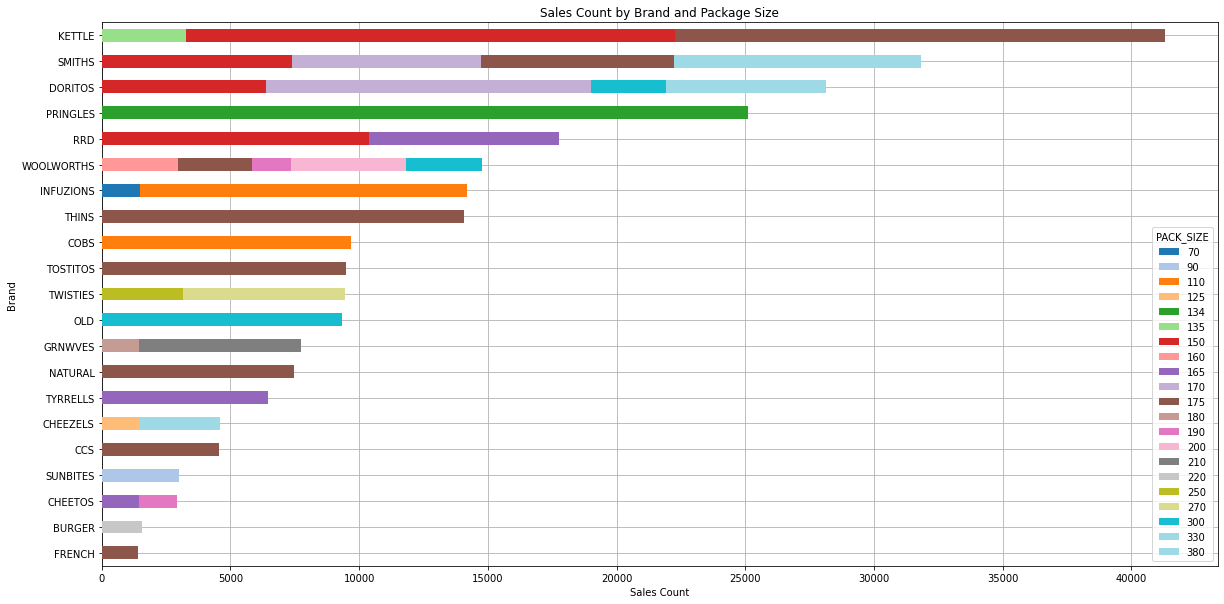

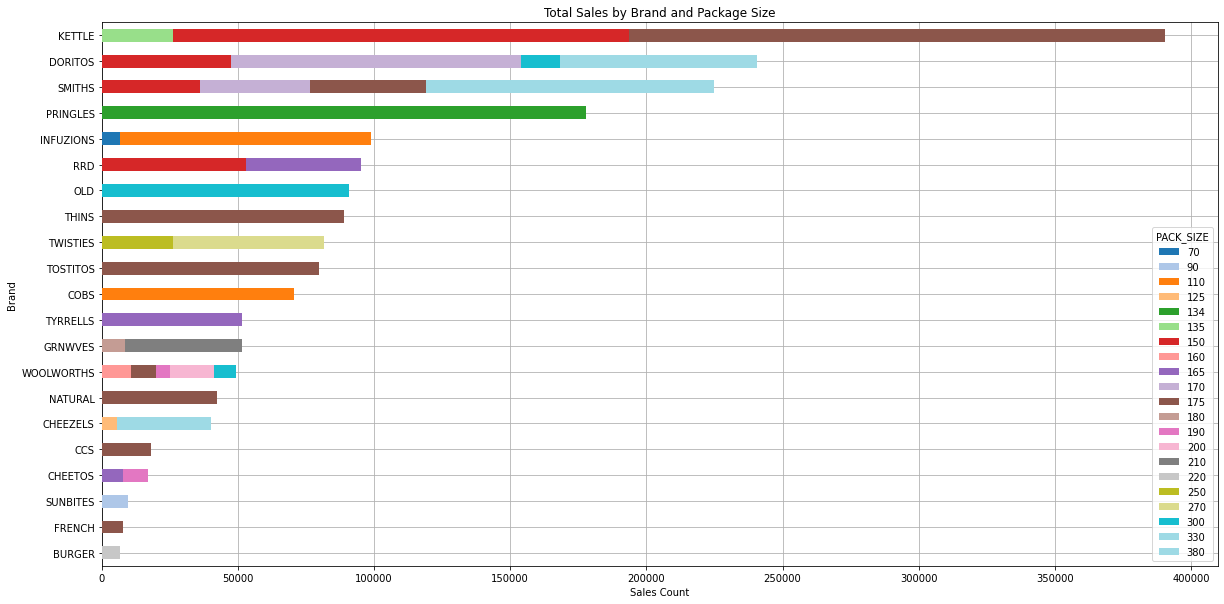

In [338]:
# Temporary dataframe to return the sum of sales count, total sales, and average sales by brand/size (for sorting purpose)
temp_df3 = brandsizesales_count.unstack()
temp_df3['SUM'] = brandsizesales_count.unstack().sum(axis=1)

temp_df4 = brandsizesales_sum.unstack()
temp_df4['SUM'] = brandsizesales_sum.unstack().sum(axis=1)

temp_df3.sort_values('SUM').TOT_SALES.plot(kind='barh', 
                                          stacked=1, 
                                          title = 'Sales Count by Brand and Package Size',
                                          xlabel = 'Sales Count',
                                          ylabel = 'Brand',
                                          figsize = (20,10),
                                          grid = 1,
                                          zorder = 4,
                                          colormap = 'tab20'
                                          )

temp_df4.sort_values('SUM').TOT_SALES.plot(kind='barh', 
                                          stacked=1, 
                                          title = 'Total Sales by Brand and Package Size',
                                          xlabel = 'Sales Count',
                                          ylabel = 'Brand',
                                          figsize = (20,10),
                                          grid = 1,
                                          zorder = 4,
                                          colormap = 'tab20'
                                          )

In [345]:
cols = ['BRAND_NAME', 'TOT_SALES'] # Returned columns
grps = ['BRAND_NAME'] # Columns to group by

cols2 = ['PACK_SIZE', 'TOT_SALES'] # Returned columns
grps2 = ['PACK_SIZE'] # Columns to group by

brandsales_mean = trans2.loc[:, cols].groupby(grps).mean()
sizesales_mean = trans2.loc[:, cols2].groupby(grps2).mean()

<Axes: title={'center': 'Average Sales by Package Size'}, xlabel='Average Sales', ylabel='Package Size'>

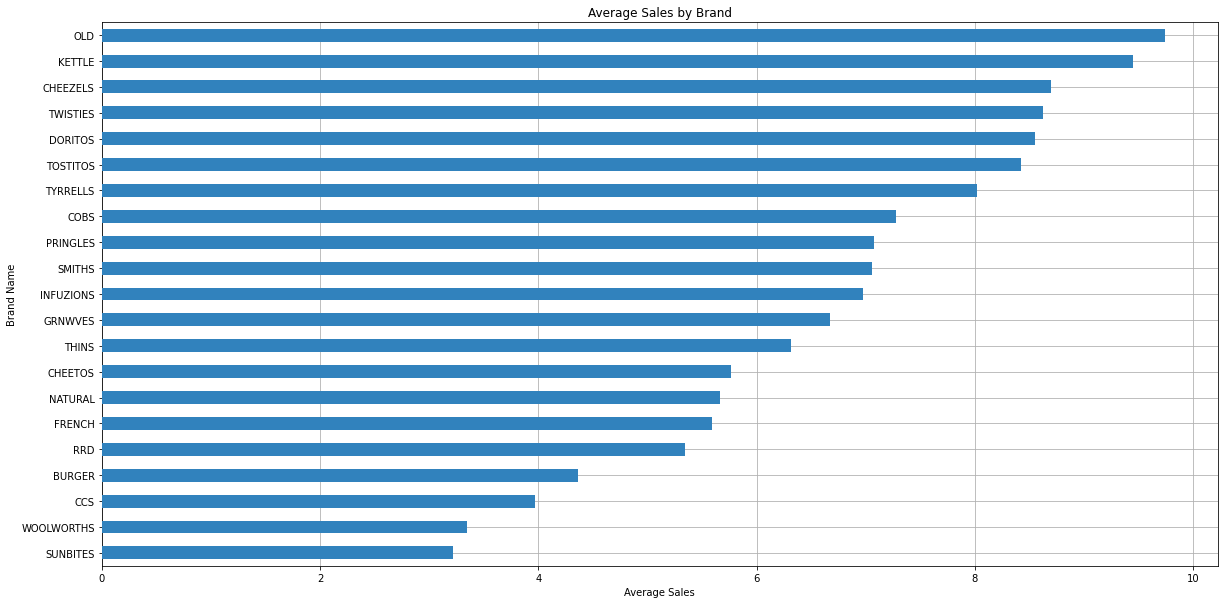

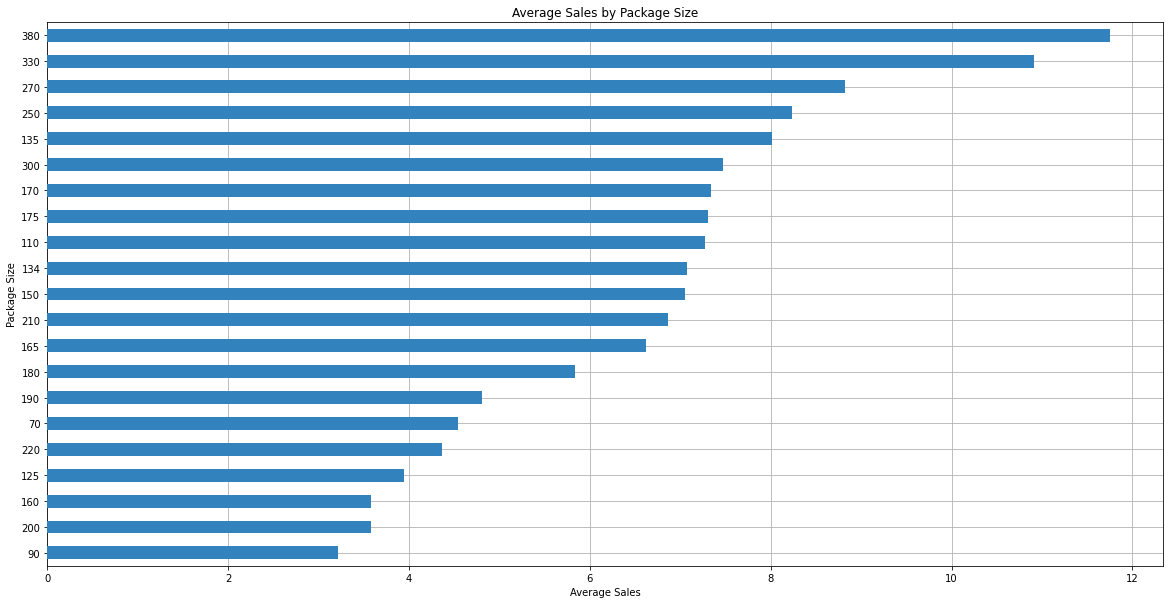

In [355]:
brandsales_mean.sort_values('TOT_SALES', ascending=1).plot(kind = 'barh',
                                                           title = 'Average Sales by Brand',
                                                           xlabel = 'Average Sales',
                                                           ylabel = 'Brand Name',
                                                           figsize = (20, 10),
                                                           colormap = 'tab20c',
                                                           grid = 1,
                                                           zorder = 4,
                                                           legend = 0)

sizesales_mean.sort_values('TOT_SALES', ascending=1).plot(kind = 'barh',
                                                           title = 'Average Sales by Package Size',
                                                           xlabel = 'Average Sales',
                                                           ylabel = 'Package Size',
                                                           figsize = (20, 10),
                                                           colormap = 'tab20c',
                                                           grid = 1,
                                                           zorder = 4,
                                                           legend = 0)


- Kettle is the top selling brand both by sales count and total sales with both 150g and 175g package size dominate the sales
- Some brands only have a single variation of package size
- More sale doesn’t always return more revenue relative to each other (different sales count and total sales rank)
- Old is the top brand by average sales, this means Old gives the most revenue per transaction 
- 380g gives the most revenue per transaction due to its higher price
- Being the smalles size, 70g is not the lowest average sales. This means that there is a market segment for small sized chips

## Grouping sales data by store

In [203]:
store_sales_count = df.loc[:, ['STORE_NBR', 'TOT_SALES']].\
    groupby(['STORE_NBR']).count().reset_index()

top10stores_count = store_sales_count.sort_values('TOT_SALES', ascending=0).head(10)
t10s_list_count = top10stores_count.STORE_NBR.tolist()

print(t10s_list_count)
top10stores_count.reset_index(drop=1)

[226, 88, 93, 165, 237, 43, 40, 230, 213, 156]


,STORE_NBR,TOT_SALES
0,226,2020
1,88,1873
2,93,1832
3,165,1819
4,237,1785
5,43,1771
6,40,1764
7,230,1751
8,213,1747
9,156,1747


In [204]:
store_sales_sum = df.loc[:, ['STORE_NBR', 'TOT_SALES']].\
    groupby(['STORE_NBR']).sum().reset_index()

top10stores_sum = store_sales_sum.sort_values('TOT_SALES', ascending=0).head(10)
t10s_list_sum = top10stores_sum.STORE_NBR.tolist()

print(t10s_list_sum)
top10stores_sum.reset_index(drop=1)

[226, 88, 165, 40, 237, 58, 199, 4, 203, 26]


,STORE_NBR,TOT_SALES
0,226,17605.45
1,88,16333.25
2,165,15973.75
3,40,15559.50
4,237,15539.50
5,58,15251.45
6,199,14797.00
7,4,14647.65
8,203,14551.60
9,26,14469.30


In [205]:
store_sales_mean = df.loc[:, ['STORE_NBR', 'TOT_SALES']].\
    groupby(['STORE_NBR']).mean().reset_index()

top10stores_mean = store_sales_mean.sort_values('TOT_SALES', ascending=0).head(10)
t10s_list_mean = top10stores_mean.STORE_NBR.tolist()

print(t10s_list_mean)
top10stores_mean.reset_index(drop=1)

[92, 96, 174, 246, 26, 40, 253, 25, 217, 235]


,STORE_NBR,TOT_SALES
0,92,9.200000
1,96,8.862020
2,174,8.837452
3,246,8.834125
4,26,8.822744
5,40,8.820578
6,253,8.814875
7,25,8.814725
8,217,8.812091
9,235,8.799002


Just like the date data, no information about store number is provided so not much interpretation can be derived. However, these are insight points based on the top 10 stores by sales count, sum, and mean:
- Store 226 is the top store by sales count and sum
- Some stores from sales count table don’t get into top 10 stores by sales sum and the order also changes
- Store 226, 88, 165, 237, 40 appear in both table

Most stores from sales count and sales sum table do not appear in average sales table, so further investigation was done

In [264]:
store_sales_count[store_sales_count['STORE_NBR'] == 92]

,STORE_NBR,TOT_SALES
91,92,1


The top store by average sales (store 92) only records a single trasaction

In [269]:
print('Store sales count descriptive stats\n',store_sales_count.describe(), end = '\n\n')
print('Bottom 10 store by sales count\n', store_sales_count.sort_values('TOT_SALES').head(10))

Store sales count descriptive stats
         STORE_NBR    TOT_SALES
count  272.000000   272.000000
mean   136.500000   973.654412
std     78.663842   587.775315
min      1.000000     1.000000
25%     68.750000   528.750000
50%    136.500000   679.000000
75%    204.250000  1525.250000
max    272.000000  2020.000000

Bottom 10 store by sales count
      STORE_NBR  TOT_SALES
91          92          1
75          76          1
210        211          2
251        252          2
205        206          2
30          31          2
10          11          2
192        193          3
84          85          3
116        117         46


[Text(0.5, 1.0, 'Sales Count Frequency'),
 Text(0.5, 0, 'Sales Count'),
 Text(0, 0.5, 'Frequency')]

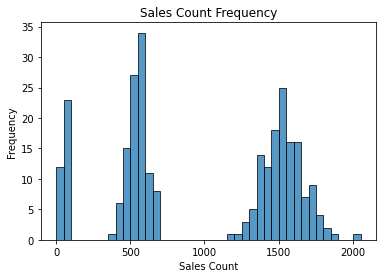

In [262]:
sb.histplot(store_sales_count['TOT_SALES'], 
            binwidth = 50,
            ).set(title='Sales Count Frequency',
                  xlabel ="Sales Count", ylabel = "Frequency")

Looking further into these aggregated tables, it is revealed that some stores transaction records are extremely low.
- Store 92 has the most average sales because it only records a single transaction
- These low transaction stores might be new stores
- Sorting store by average sales isn’t reliable with this condition

More information on the store number data is needed to make further interpretations

# Key Takeaways

Conclusion of our findings:
- Generally, mainstream and older singles/couples contribute to sales the most
- Namely, the top contributing customer lifestages of each class are: budget older families, mainstream retirees, premium older singles/couples
- Kettle with 150g and 175g package size are the top selling products
- Old products and 380g package size give the most revenue per transaction
- 70g (smallest package size) products have better sales than some bigger size products, indicating a prospective market segment
- Store 226 is the top performing store